In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os, glob

In [19]:
def show_images(images, cmap=None):
        cols = 2
        rows = (len(images)+1)//cols
        
        plt.figure(figsize=(15, 12))
        for i, image in enumerate(images):
            plt.subplot(rows, cols, i+1)
            cmap = 'gray' if len(image.shape)==2 else cmap
            plt.imshow(image, cmap=cmap)
            plt.xticks([])
            plt.yticks([])
        plt.tight_layout(pad=0, h_pad=0, w_pad=0)
        plt.show()

### Image for testing

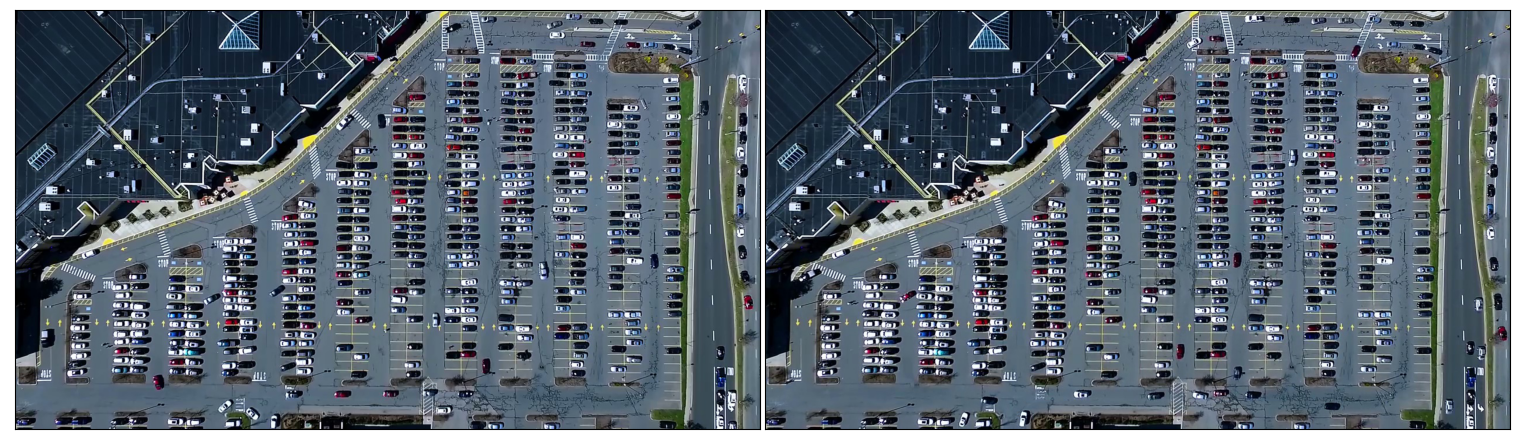

In [20]:
path = 'data/test_images/*.jpg'

test_images = [plt.imread(path) for path in glob.glob(path)]

show_images(test_images)

### Only keep the "yellow" line part and filter out another colors.

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


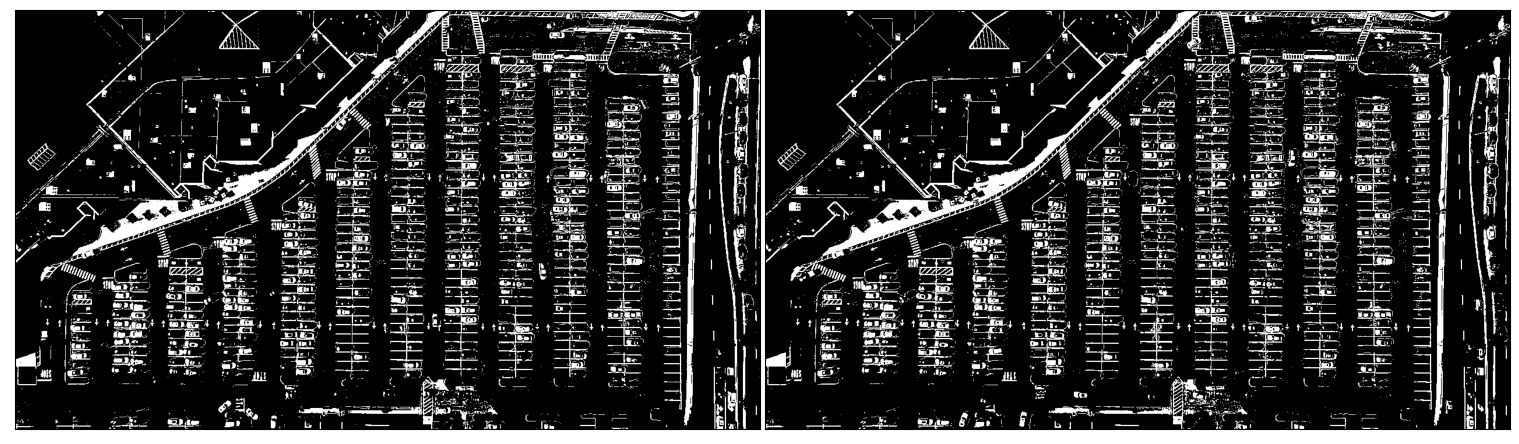

In [25]:
# image is expected be in RGB color space# image 
def select_rgb_white_yellow(image): 
    # white color mask
    lower = np.uint8([120, 120, 120])
    upper = np.uint8([255, 255, 255])
    white_mask = cv2.inRange(image, lower, upper)
    # yellow color mask
    lower = np.uint8([190, 190,   0])
    upper = np.uint8([255, 255, 255])
    yellow_mask = cv2.inRange(image, lower, upper)
    # combine the mask
    mask = cv2.bitwise_or(white_mask, yellow_mask)
    masked = cv2.bitwise_and(image, image, mask = mask)
    return masked

white_yellow_images = list(map(select_rgb_white_yellow, test_images))
show_images(white_yellow_images)